In [12]:
# python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# add relative path given the workspace ML-FOR-BEGINNERS at the root
csv_path = "../../../5-Clustering/data/nigerian-songs.csv"
# or absolute path e.g. USING &WORKSPACE/5-Clustering/data/nigerian-songs.csv
cvs_path = "/absolute/path/to/your/ML-FOR-BEGINNERS/5-Clustering/data/nigerian-songs.csv"


In [13]:

# load & keep numeric features
df = pd.read_csv(csv_path)
X = df.select_dtypes(include=[np.number]).dropna(axis=1, how="all").dropna()


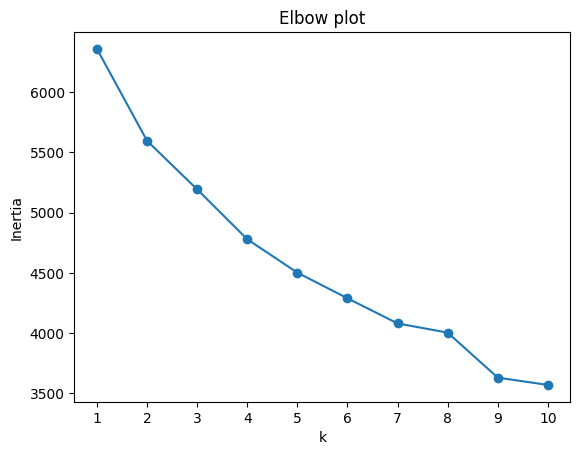

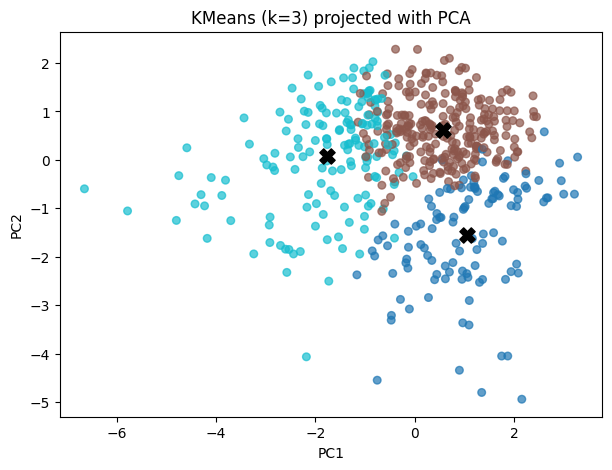

In [9]:

# scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# elbow: inertia vs k
inertias = []
ks = range(1, 11)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(ks, inertias, "-o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow plot")
plt.xticks(ks)
plt.show()

# choose k (inspect elbow and set chosen_k)
chosen_k = 3

km = KMeans(n_clusters=chosen_k, random_state=42, n_init="auto")
labels = km.fit_predict(X_scaled)

# 2D projection for visualization
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X_scaled)
centroids2 = pca.transform(km.cluster_centers_)

plt.figure(figsize=(7, 5))
scatter = plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap="tab10", s=30, alpha=0.7)
plt.scatter(centroids2[:, 0], centroids2[:, 1], c="black", s=120, marker="X")
plt.title(f"KMeans (k={chosen_k}) projected with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

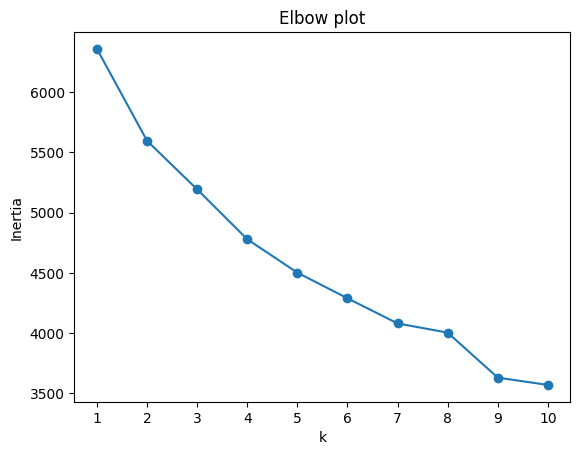

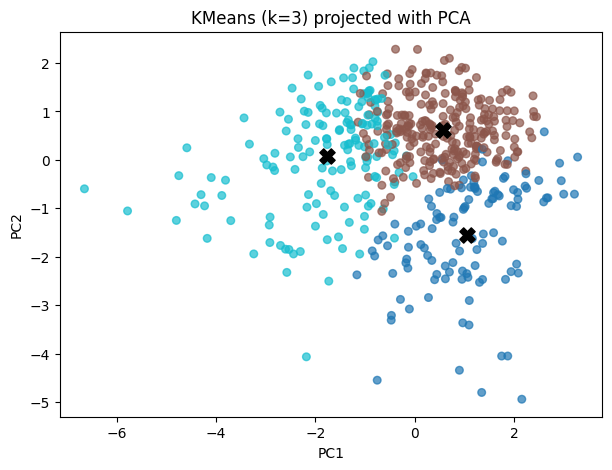

In [10]:

# load & keep numeric features
df = pd.read_csv(csv_path)
X = df.select_dtypes(include=[np.number]).dropna(axis=1, how="all").dropna()

# scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# elbow: inertia vs k
inertias = []
ks = range(1, 11)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(ks, inertias, "-o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow plot")
plt.xticks(ks)
plt.show()

# choose k (inspect elbow and set chosen_k)
chosen_k = 3

km = KMeans(n_clusters=chosen_k, random_state=42, n_init="auto")
labels = km.fit_predict(X_scaled)

# 2D projection for visualization
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X_scaled)
centroids2 = pca.transform(km.cluster_centers_)

plt.figure(figsize=(7, 5))
scatter = plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap="tab10", s=30, alpha=0.7)
plt.scatter(centroids2[:, 0], centroids2[:, 1], c="black", s=120, marker="X")
plt.title(f"KMeans (k={chosen_k}) projected with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()